# Банки — Сегментация пользователей по продукту.

## Материалы
* [Презентация](https://disk.yandex.ru/d/V06t80TIS1MepQ) 
* [Дашборд](https://public.tableau.com/app/profile/denis.dorofeev/viz/Book3_16865731236020/Dashboard1?publish=yes)

**Задача:**

Проанализируем клиентов регионального банка и сегментируем пользователей по количеству потребляемых продуктов, обращая особое внимание на отток. Задача снизить отток клиентов банка.
 

**Цель:**

Задача снизить отток клиентов банка.

**Описание данных:**

Датасет bank_scrooge.csv содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество объектов в собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

**Этапы исследования:**

**1. Загрузка данных и библиотек. Изучение общей информации**

- Общий обзор датасета (размер, содержание)
- Проверка на соответствие типов данных

**2. Предобработка данных**

-	Исследовать пропущенные значения;
-	Исследовать дубликаты;
-	Проверить корректность наименований полей;
-	Привести типы данных при необходимости;
-	Заменить пропущенные значения при необходимости.

**3. Исследовательский анализ данных**

- Построение матрицы корреляций
- Графики распределения признаков
- Сабплоты и автоматизация оформления графиков
- Распределение признаков в разрезе данных по продукту

**4. Сегментация**

- Сегментируем пользователей по количеству потребляемых продуктов
- Строим графики по пользователей по количеству потребляемых продуктов
- Возможна сегментация по другим признакам, таким как пол, город, возраст
- Описание портретов получившихся сегментов

**5. Статистическая проверка гипотез**

- Проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
- Формулировка второй гипотезы исследования будет сформирована в результате выявлених закономерностей исследовательского анализа данных и сегментации по разным признакам.

**6. Выводы, рекомендации по удержанию клиентов**

- Для каждого сегмента вывод и рекомендации по продуктам

**7. Презентация**

**8. Дашборд**

##  Загрузка данных и библиотек. Изучение общей информации.

In [1]:
import pandas as pd # импортируем бибилиотеки
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go 
import plotly.express as px
import numpy as np

from scipy.stats import shapiro 
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
# настройки отображения
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)

In [3]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

Смотрим на содержание и размер датасета.

In [4]:
def display_dataframe_info(df):
    print(f'Название датафрейма df, количество явных дубликатов {df.duplicated().sum()}')
    display(df.head())
    display(df.info())
    'Информация о содержимом файла:'
    display(df.describe(include='all'))
    display(df.isna().mean().sort_values(ascending=False)*100)
    print('- ' * 50)

In [5]:
display_dataframe_info(df)

Название датафрейма df, количество явных дубликатов 0


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,10000,10000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5888,5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,171814.71260,848.699400,NaN,NaN,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,NaN,NaN,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,NaN,NaN,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,NaN,NaN,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,NaN,NaN,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,NaN,NaN,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000


balance          22.95
age               0.26
USERID            0.00
score             0.00
city              0.00
gender            0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


В датасете 10000 строк, 12 столбцов.
Минимальный возраст нашего клиента 18 лет, все клиенты совершеннолетние.  Общее число продуктов которыми может пользоваться клиент 5. Следовательно, сегментация по продукту подразумевает предварительно 5 групп. Имеются пропуски в балансе 22,95% и возрасте 0,26%. Типы данных корректные.

##  Предобработка данных.

Приведение наименования столбцов к нижнему регистру в соответсвии с snacke_case.

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Скорректируем наименование 'userid'.

In [7]:
df = df.rename(columns={'userid':'user_id'})

**gender на int**

Заменим значения в столбце gender на int для исследования корреляции и дальнейшей сегментации с построением графиков.

In [8]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

In [9]:
df.loc[df['gender']=='М', 'gender'] = 1
df.loc[df['gender']=='Ж','gender'] = 0

In [10]:
df['gender'] = df['gender'].astype(int)

Смотрим результат

In [11]:
df['gender'].value_counts()

1    5005
0    4995
Name: gender, dtype: int64

Проверим уникальные названия городов и их количество.

In [12]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

3 города, все верно.

**Пропуски возраста**

Проанализируем пропуски в возрасте и решим, что с ними делать.

In [13]:
df.loc[df['age'].isna() == True]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,1,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,0,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,1,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,0,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,1,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,0,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,0,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,0,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,0,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,0,NaN,3,188648.77,2,0,1,75206.90,0


Судя по пропускам в столбце возраста, распределение вполне нормальное в данных других столбцов. Но churn почти везде 0, и данные клиенты активные, но много пропусков в балансе. Доля пропусков от всего датасета 0,26 %, что очень мало. Удалим пропуски из датасета т.к. их очень мало и он не повлияют на распределение.

In [14]:
df = df.dropna(subset=['age']).reset_index(drop=True)
df['age'].isna().sum() #проверка

0

В поле balance пропуски достигаю 22,95%. Удалять такую значительную часть датасета мы не будем, т.к. пропуски могут повлиять на определение в других сегментах датасета и их природа нам на данный момент не известна. Данных для заполнения поля на данном этапе мы не имеем.  Возможно на этапе исследовательского анализа данных придётся поставить заглушку, но сейчас все оставим как есть.

**Пропуски balance**

Наша задача сегментировать клиентов по количеству потребляемых продуктов, обращая особое внимание на отток. Исследуем значение churn. Посмотрим на пропуски баланса, т.к. возможно многочисленные пропуски в нем свидетельствуют о том, что клиент нас покинул.

In [15]:
df.query('balance.isna()').groupby('churn')['churn'].count()

churn
0    2266
1      13
Name: churn, dtype: int64

Только 13 клиентов покинули банк. Делаем вывод, что пропуски баланса не  связаны с ушедшими клиентами.

Возможно пропуски баланса имеются в определенном представительства банка в отдельном городе. Посмотрим пропуски баланса в разрезе городов.

In [16]:
df.query('balance.isna()').groupby('city')['city'].count()

city
Ростов        235
Рыбинск       586
Ярославль    1458
Name: city, dtype: int64

Теперь сравним по долям в разрезе городов данные с пропусками баланса и без них.

In [17]:
df.query('balance.isna()').groupby('city')['city'].count()/len(df.query('balance.isna()'))*100

city
Ростов       10.311540
Рыбинск      25.713032
Ярославль    63.975428
Name: city, dtype: float64

In [18]:
df.groupby('city')['city'].count()/len(df['city'])*100

city
Ростов       14.196912
Рыбинск      26.899940
Ярославль    58.903148
Name: city, dtype: float64

Доли пропусков баланса по городам сравнимы с долями указанных балансов в разрезе городов.
Построим гистограммы по количественным признакам, возможно увидим закономерности в пропусках.

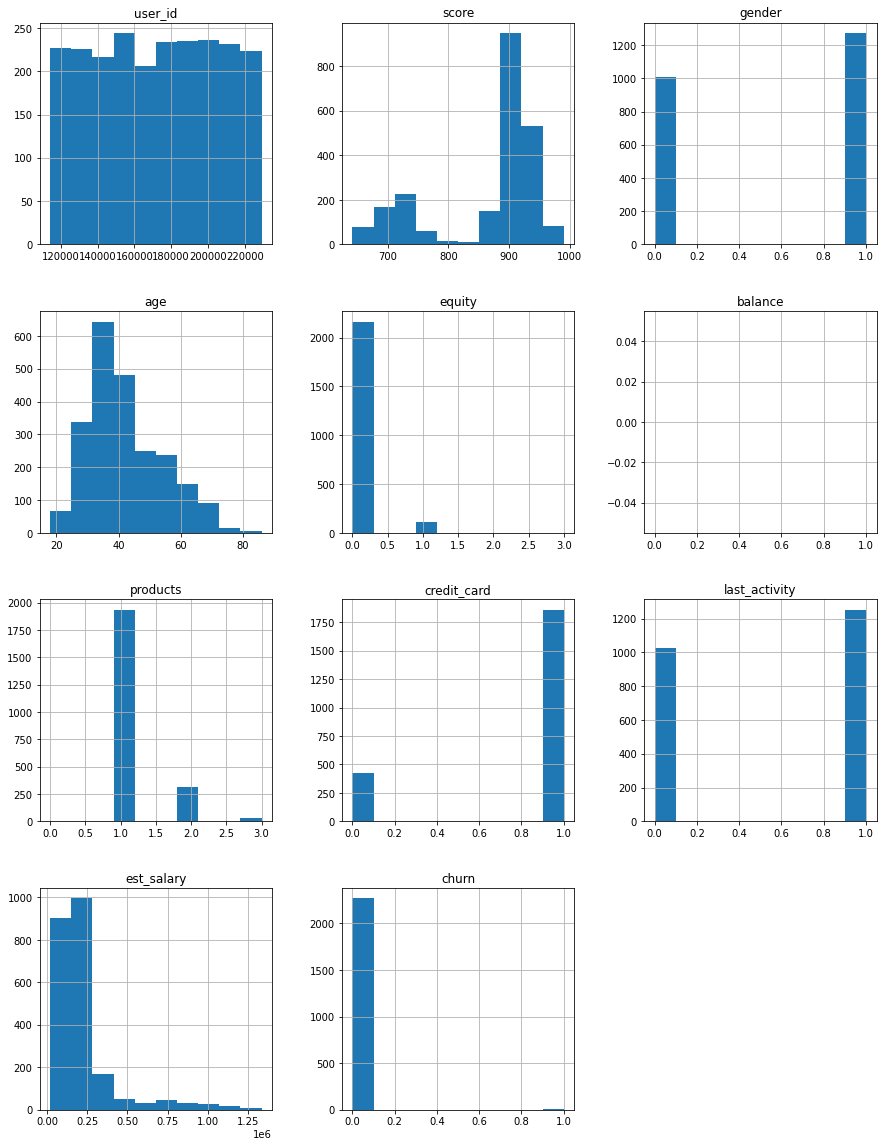

In [19]:
df.query('balance.isna()').hist(figsize=(15, 20)); # гистограммы количественных переменных

Наблюдаем выделяющиеся значения с высокими значениями по количеству продуктов. Подавляющее большинство клиенты с одним продуктом. При это shurn = 0, то есть клиента все активные и практически все не имеют объектов в собственности. Это му есть подтверждение, т.к. большинство из них имеют кредитную карту.
Т.к. наша основная задача снизить отток клиентов сегментирую по кол-ву потребляемых продуктов, то обращаем внимание пользователи с пропусками в балансе все активные и оттока у них нет. Проверим действительно ли это для всех клиентов с 1 продуктом.

In [20]:
df.query('products == 1').groupby('churn')['churn'].count()

churn
0    3088
1     235
Name: churn, dtype: int64

In [21]:
df.query('products == 1').groupby('churn')['churn'].count()/len(df.query('products == 1'))*100

churn
0    92.928077
1     7.071923
Name: churn, dtype: float64

Только 7% клиентов с 1 продуктом покинули банк. На данный момент делаем вывод, что клиенты с пропусками в балансе почти все пользователи 1 продукта в банке и очень лояльны, являются надежными клиентами. Данные клиенты имеют кредитные карты в качестве 1 продукта банка и покидают его при закрытии кредитки. Возможно им нужно предлагать доп. продукты банка для более продолжительной связи с банком, т.к. при закрытии кредитки клиент нас покидает. Нужно повысить удержание клиента путем предложения получения зарплаты на дебетовую карту, повышенном кешбеком на нее т.к. данные клиенты имеют свойство пользоваться заемными средствами и возврат их стимулирует активнее пользоваться продуктом.
Оставляем в датасете клиент с пропусками в балансе и ничем и не заполняем, что бы не смазать распределение в связи с их многочисленностью.

**Дубликаты user_id**

Проверим неявные дубликаты по user_id.

In [22]:
df[['user_id']].duplicated().sum()

50

Введем переменную с дубликатами по  user_id и подробно рассмотрим.

In [23]:
user_id_duplicated = df.loc[df['user_id'].duplicated()==True].sort_values(by=['balance'])
user_id_duplicated.head(50)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9750,124450,758.0,Рыбинск,0,36.0,0,73574.07,2,0,1,79963.59,0
7262,164676,790.0,Рыбинск,0,77.0,1,111202.01,1,1,0,32835.45,0
8716,162053,786.0,Ярославль,1,29.0,4,205824.97,3,1,0,121371.73,0
5800,217619,766.0,Ярославль,1,52.0,2,218199.47,1,1,0,120356.44,0
9760,168998,895.0,Рыбинск,1,44.0,0,282653.53,3,0,0,255296.47,0
5563,208815,773.0,Ярославль,1,39.0,4,288110.09,2,1,0,56971.91,0
4182,217643,804.0,Рыбинск,0,40.0,2,301836.65,2,1,1,81137.22,0
8481,227795,839.0,Ярославль,1,34.0,2,326593.14,2,1,0,103314.92,0
9635,195884,767.0,Рыбинск,0,45.0,1,335652.56,3,1,1,100197.67,0
8505,210627,804.0,Рыбинск,1,30.0,2,347818.88,3,1,0,129015.25,0


В дублях пресутсвуют активные клиенты, но почти у половины отсутствует баланс. И нет клиентов с Ростова.

Дубликаты по user_id в разрезе других параметров не дают четкой взаимосвязи. Однако появление данных дублей может быть связано программно, с учетом специфики ведения базы данных банка. Скорее всего дубли появляются в связи с изменением параметров клиента, например пользование новом продуктом, изменение статуса churn, изменение возраста клиента, приобретением нового  объекта в собственность. Возникает вопрос к дата инженерам о корректности наполнения и ведения базы данных. Воронку каждого клиента мы могли бы отследить при наличии столбца с датами в датасете, но его нет. Задачи сегментации по времени у нас не стоит, следовательно, данные клиенты в силу своей немногочисленности не будут мешать исследованию для наших целей, даже если churn стал 1, вместо 0 и клиент уже попрощался с нами.

**Выбросы**

Ранее методом describe мы рассмотрели пиковые значени в данных. Посмотрим на выбросы в данных, ошибки и аномалии теперь при помощи боксплот для каждого нужного признака.

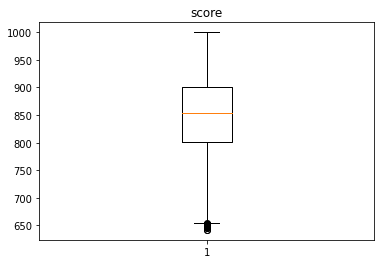

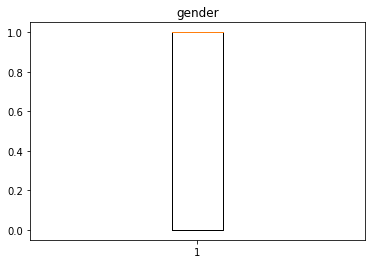

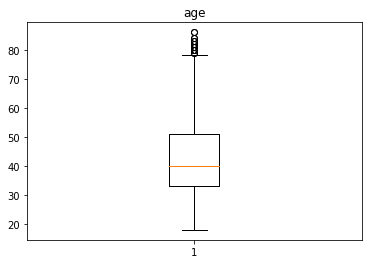

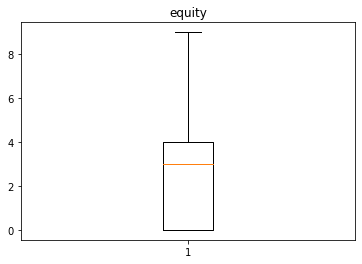

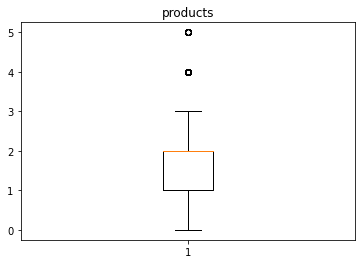

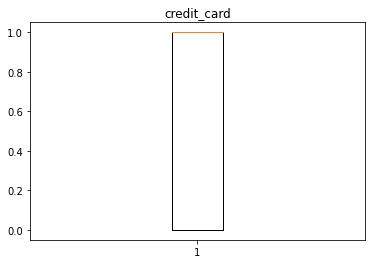

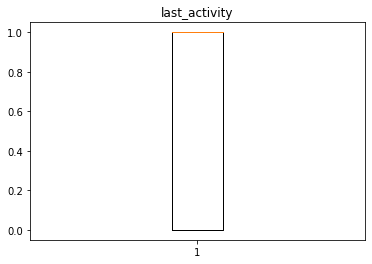

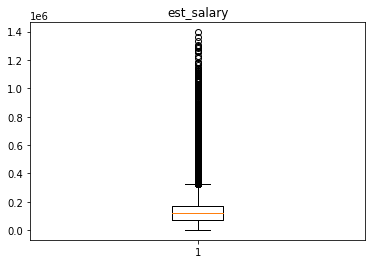

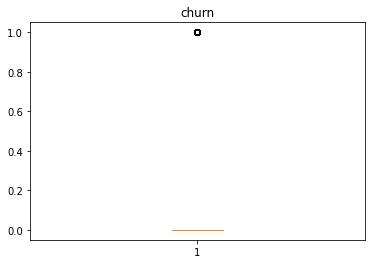

In [24]:
# список столбцов, для которых необходимо построить boxplot
columns = ['score', 'gender', 'age', 'equity',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn']
# создание отдельного графика для каждого столбца
for column in columns:
    plt.figure()  # создание нового графика
    plt.boxplot(df[column])  # построение boxplot для столбца
    plt.title(column)  # добавление заголовка графика
    plt.show()  # отображение графика

Максимальная зарплата в 1,4 млн. рублей не кажется аномальной в распределении, так же максимальный возраст не достигает 90 лет, что правдоподобно. 
Так же нет явно выделяющихся значений скоринга, кол-ва объектов недвижимости, продуктов.
Боксплот баланса отразим подробно отдельно.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1849184c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1849879370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1849184910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1849879a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1849879d90>],
 'means': []}

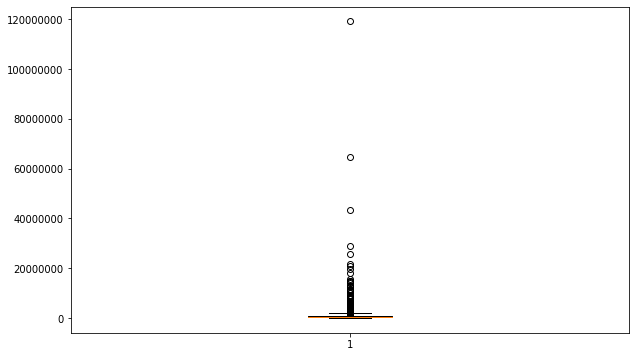

In [25]:
# строим ящик с усами исключая исключая нулевые значения.
plt.figure(figsize =(10, 6))
plt.ticklabel_format(style='plain')
plt.boxplot(df[df['balance']>0]['balance'])

Видим много выбросов. Имеется клиент с самым большим балансом 120 миллионов. Не считаем эти значения аномальными. Скорректируем размер графика, что бы сделать его читаемым. Отразим клиентов баланс которых не превышает 2 миллионов, что равно верхнему квартилю (75-й процентиль).

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18497428b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1849742f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1849742550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f184974e670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f184974e9d0>],
 'means': []}

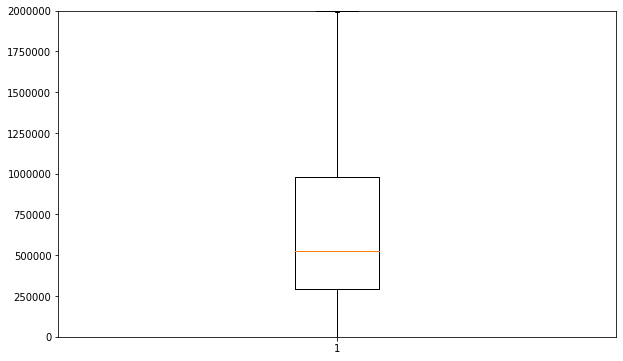

In [26]:
plt.figure(figsize =(10, 6))
plt.ylim(0,2000000) 
plt.ticklabel_format(style='plain')
plt.boxplot(df[df['balance']>0]['balance'])

Медианный баланс около 50 т.р. основаная масса клиентов с балансом до 100 тыс. рублей. распределение правдоподобное.

Выбросов и аномалий в данных нет.

## Исследовательский анализ данных

**Построение матрицы корреляций**

Предварительно выполним кодировку по городам для отражения корреляции в новой переменной.

In [27]:
df_corr = pd.get_dummies(df, columns=['city'], prefix=['city'], drop_first=False)

In [28]:
corr_df = df_corr.corr(method='pearson') # формируем матрицу корреляции
corr_df.style.background_gradient(cmap='coolwarm') # применяем расцветку ячеек

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
user_id,1.000000,0.008778,0.030335,0.017795,0.005837,0.005479,-0.003175,0.005001,-0.032022,-0.001103,-0.010865,-0.032729,0.013567,0.010990
score,0.008778,1.000000,0.011229,-0.011814,0.064809,0.235283,-0.004071,-0.095261,-0.030343,0.164166,0.106404,-0.037573,-0.000789,0.027365
gender,0.030335,0.011229,1.000000,-0.212821,-0.020815,0.051271,-0.022131,0.126088,-0.013084,0.082572,0.141644,-0.014690,-0.015183,0.024104
age,0.017795,-0.011814,-0.212821,1.000000,0.020628,0.069745,0.017182,-0.123128,-0.008157,-0.039598,-0.049797,0.046985,0.029453,-0.059876
equity,0.005837,0.064809,-0.020815,0.020628,1.000000,0.163793,0.430945,-0.167271,-0.002011,-0.171515,0.270084,0.035364,-0.004973,-0.020604
balance,0.005479,0.235283,0.051271,0.069745,0.163793,1.000000,0.075716,-0.059850,0.024770,0.338800,0.085915,-0.035635,-0.034420,0.056967
products,-0.003175,-0.004071,-0.022131,0.017182,0.430945,0.075716,1.000000,-0.251120,0.037555,-0.117556,0.300621,-0.006884,-0.042255,0.042967
credit_card,0.005001,-0.095261,0.126088,-0.123128,-0.167271,-0.059850,-0.251120,1.000000,-0.033173,0.036006,-0.130388,-0.098002,-0.050363,0.114911
last_activity,-0.032022,-0.030343,-0.013084,-0.008157,-0.002011,0.024770,0.037555,-0.033173,1.000000,0.002944,0.169420,0.007264,0.048512,-0.048876
est_salary,-0.001103,0.164166,0.082572,-0.039598,-0.171515,0.338800,-0.117556,0.036006,0.002944,1.000000,0.001705,-0.105923,-0.056671,0.126215


Согласно матрице корреляции Пирсона мы наблюдаем небольшие зависимости между количеством объектов в собственности у клиента количеством используемых продуктов (0,43). Это объяснимо, т.к. собственники объектов недвижимости обычно являются пользователями продуктов банка (ипотека, страховка, дебетовая карта и т.п.) Так же между churn немного (0,30) коррелирует с количеством продуктов и незначительно с заработной платой (0,27). Данное наблюдение нам пригодится при построении графиков.

**Графики распределения признаков**

Для визуализации распределения признаков создадим функцию `tables` с настройками графиков

In [29]:
#hue- признак, по которому мы хотим увидеть детализацию данных

def tables(data, hue=None):
    #дискретные значения
    for column in ['city','gender', 'credit_card', 'equity', 'products', 'last_activity', 'churn']:
        ax = sns.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()
    
    plt.figure(figsize=(16,7))
    sns.countplot(data=data, x='age', hue=hue);
    plt.title('Распределение клиентов по признаку age', fontsize = 16, color = 'black')
    plt.show()

    #непрерывные значения
    for column in ['score',  'balance', 'est_salary']:
        sns.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()

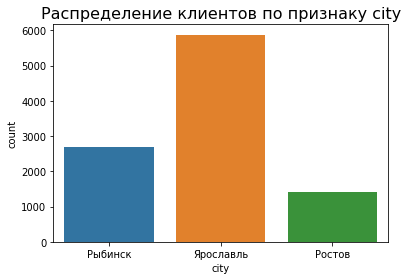

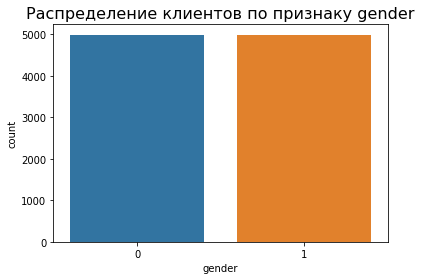

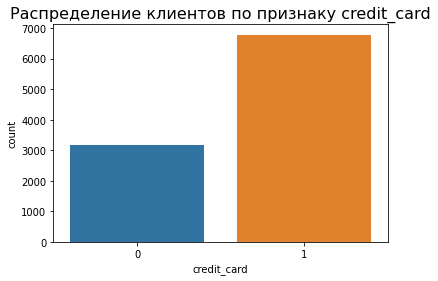

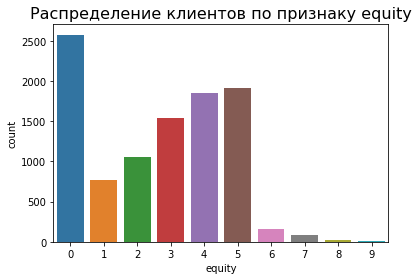

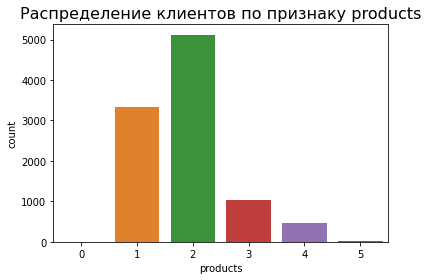

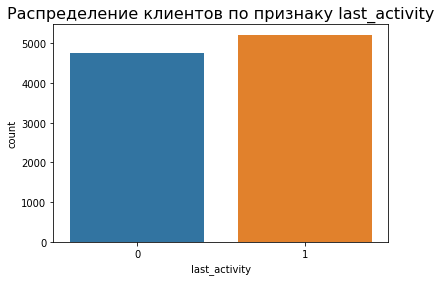

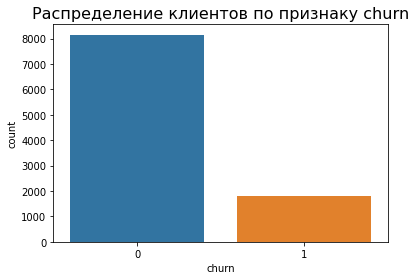

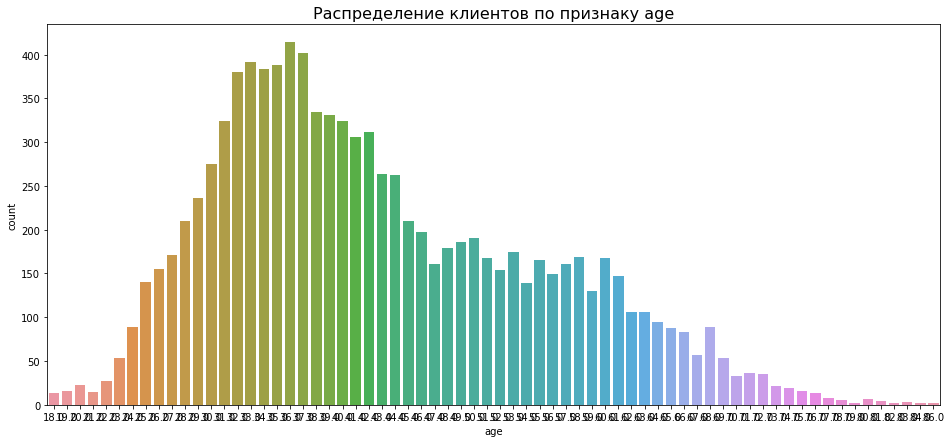

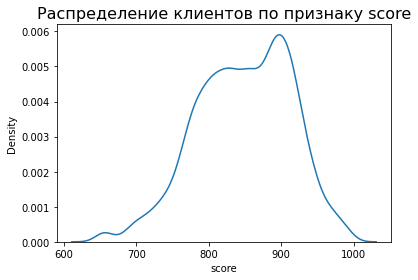

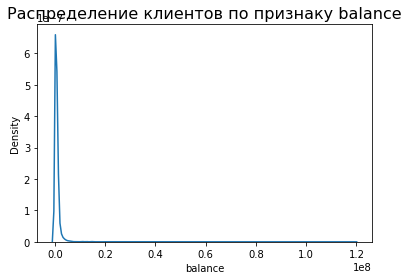

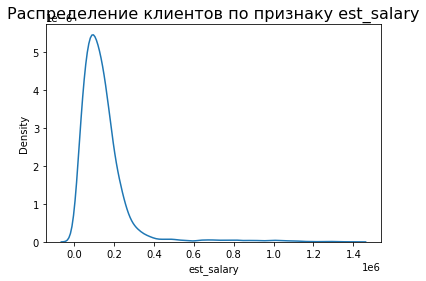

In [30]:
#формируем визуализацию
tables(df, hue=None) 

Доля клиентов по городам:

Ростов - 14.19

Рыбинск - 26.89

Ярославль - 58.90

Ярославль занимает доминирующую позицию среди городов с представительством банка.

В нашем исследовании практически одинаковое кол-во мужчин и женщин.  В два раза клиентов с кредитными картами больше, чем без них. Большинство клиентов в возрасте 30-
45 лет.
Четверть всех клиентов не имеют объектов в собственности и большая доля тех, кто имеет 4 и 5 объектов в собственности. Скорее всего у таких клиентов большая кредитная нагрузка.
Чуть больше половины активных клиентов, это немного учитывая, что клиентов кредитными картами намного больше. Нужно способствовать более активному пользованию кредитками данного сегмента клиентам.
В основном пользуются клиента 1 или 2 продуктами банка, один из которых кредитная карта. Самые многочисленные клиенты с 2 продуктами, таких половина от всех.
Отток составляет около 20%.  В соответствии с данными каждый четвертый покинул наш банк, что много.
Заработная плата практически всех клиентов не превышает 200 т.р. В среднем это 100 т.р.

**Визуализация распределения в разрезе данных по продукту**

Воспользуемся нашей функцией `tables` и передадим параметру hue, столбец 'products'.

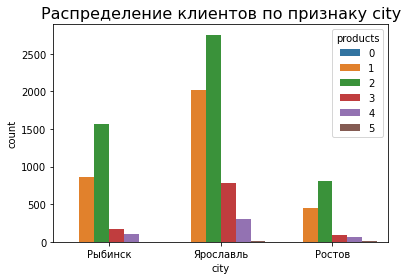

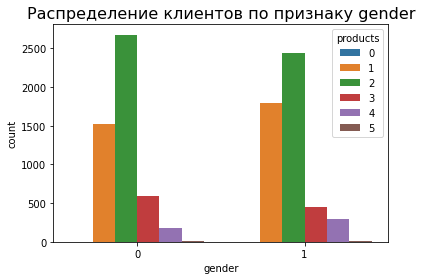

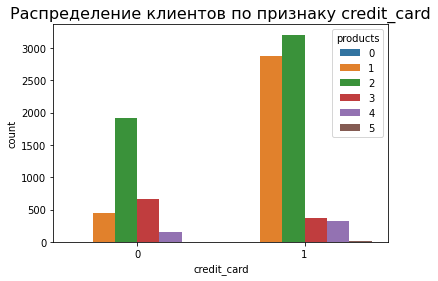

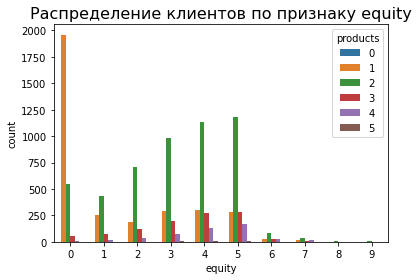

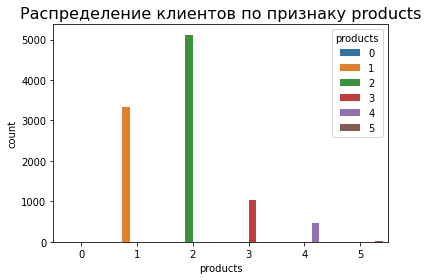

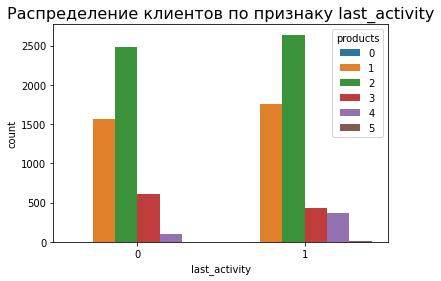

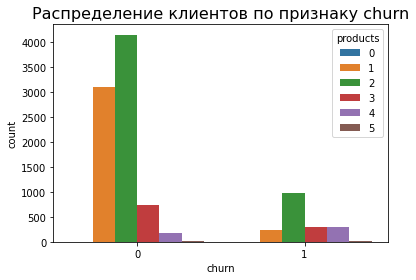

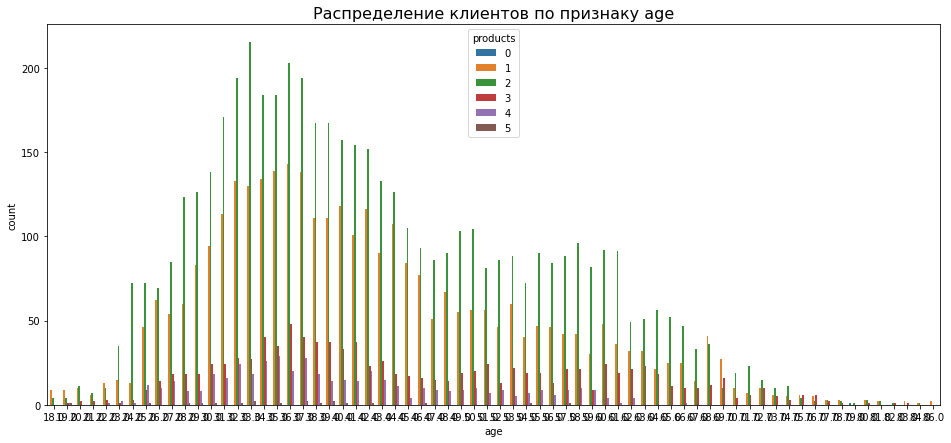

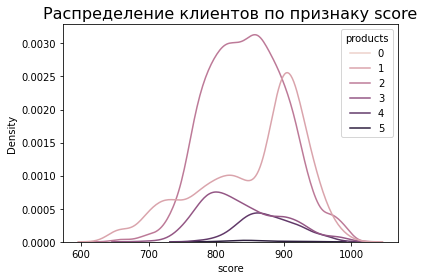

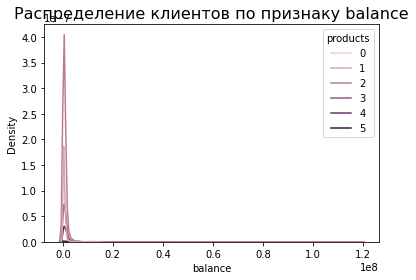

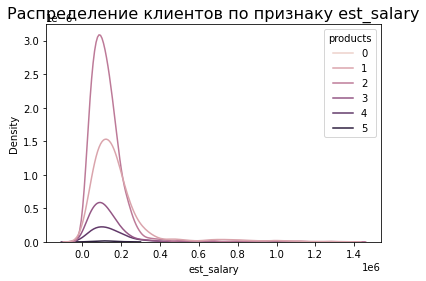

In [31]:
#формируем визуализацию
tables(df, hue='products') 

Пропорции по количеству продуктов разрезе городов, пола, заработной платы и активности клиента практически одинаковые и по этим признакам не отличаются. Баланс всех клиентов не многочисленный.
У большинства клиентов нет объектов в собственности и они являются пользователями одного продукта банка, скорее всего это кредитная карта. Так же имеются клиента у которых 2 продукта банка, но нет кредитки, таких каждый пятый.

Есть тенденция, что собственники нескольких объектов пользуются только 2 продуктами, и не всегда один из них кредитная карта.

Активность клиентов по продукту распределена почти одинаково, только клиенты с 4 продуктами более активны. Возможно их долговая нагрузка уже высока и они ищут доп. условия банка.

По возрасту пользователи с разным количеством продуктов распределены равномерно.

Так же их баллы кредитного скоринга средние у клиентов с 4 и 5 продуктами. Интересно будет увидеть их отток. Клиенты с 2 продуктами имеют равномерное распределение баллов, они средние. Клиенты с 1 продуктом на пике имеют балл 900. Это наши пользователи кредиток.

И так мы выделяем две группы с закономерностями кол-ва используемых продуктов.

**Первая:** Клиенты с кредитной картой и одним продуктом с малым оттоком и большими баллами скоринга. Потенциально могут пользоваться доп. продуктами банка и требуют внимания. Категория с низким или средним рейтингом будет исследована ниже на отток.

**Вторая:** Клиенты с 3, 4 и 5 продуктами банка и невысоким рейтингом, где отток больше половины клиентов. Это экстренные клиенты, которых нужно срочно удерживать.

Исследуем группы подробнее в разрезе признаком активности и оттока, скоринга и т.д.

Посмотрим на клиентов с кредитными картами и без. Сколько у них продуктов, возраст, отток и зарплата.

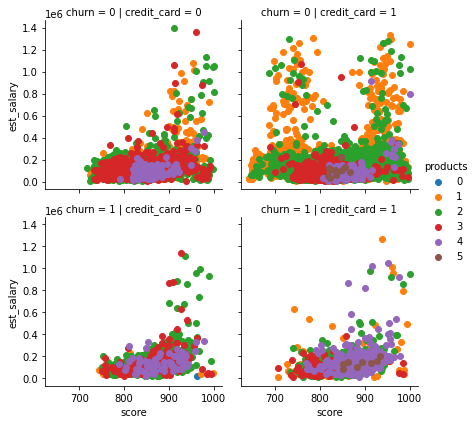

In [32]:
g = sns.FacetGrid(df, col="credit_card", row="churn", hue='products')
g = g.map(plt.scatter, "score", "est_salary").add_legend();

Видим клиенты с кредитной картой имеют большую зарплату, при этом у них меньше продуктов банка, всего 1 или 2.
У части клиентов с одним продуктом в качестве кредитной карты имеется малый рейтинг и большая зарплата.
Ушедшие клиенты, это клиенты с 3 и 4 продуктами без большой зарплаты и средним кредитным рейтингом. Наличие кредитной карты не влияет на удержание клиентов в малым кредитным рейтингом, но большой зарплатой.
Клиенты с разным рейтингом имеются в оттоке, но непременно с большим количеством продуктов.

Теперь рассмотрим вторую группу, активных клиентов с продуктами в разрезе рейтинга и оттока.


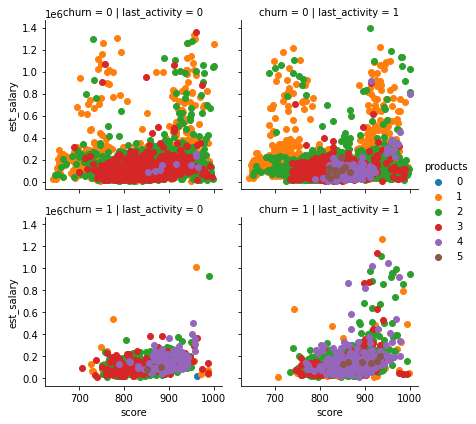

In [33]:
r = sns.FacetGrid(df, col="last_activity", row="churn", hue='products')
r = r.map(plt.scatter, "score", "est_salary").add_legend();

Что ж, подкинувшие нас клиенты имеют неплохой кредитный рейтинг и несколько продуктов банка. Некоторые их них активные с большой зарплатой. Пользователи кредиток и 1 продукта почти нет в оттоке, несмотря на не всегда высокие рейтинги скоринга. Скорее всего скоринг завышен таких клиентов и не отражает их реальную платежеспособность на данный момент.

Наблюдая корреляцию между количеством продуктов и объектов недвижимости, исследуем их в разрезе оттока. Рассмотрим отток клиентов с несколькими продуктами и объектами недвижимости по полу и доходу.

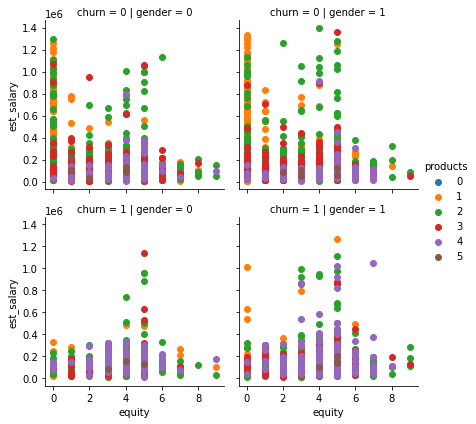

In [34]:
d = sns.FacetGrid(df, col="gender", row="churn", hue='products')
d = d.map(plt.scatter, "equity", "est_salary").add_legend();

Отток мужчин немного превалирует с несколькими объектами в собственности и 2-4 продуктами с большой зарплатой над женщинами. Выделяется отток мужчин с 3-5 продуктами и обетами в собственности. Мужчин в оттоке больше чем женщин.

И так наши группы с активными кредитками действительно с малым оттоком, а уход клиентов с несколькими продуктами и средним-высоким рейтингом имеет место.

Посмотрев распределения и закономерности признаком сведем их в таблицу и убедимся в наших исследованиях.

**Общее распределение признаков по оттоку:**

In [35]:
df.groupby(['churn'])['score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary'].mean()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary
churn,,,,,,,,,
0,845.396199,0.466953,43.020846,2.378296,7.330316e+05,1.758921,0.708890,0.482894,147674.637881
1,863.416163,0.650357,41.450247,3.763057,1.134458e+06,2.376031,0.551402,0.702034,148289.702221


Банк покидают больше мужчины, чем женщины. Действительно объектов и продуктов в собсвенности больше у покинувших нас клиентов. При этом они достаточно активны и половина не имеют кредитных карт.

Посмотрим распредление в разрезе оттока.

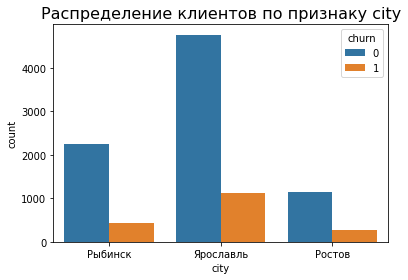

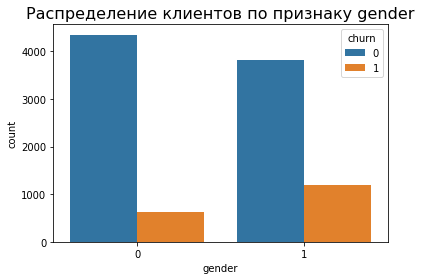

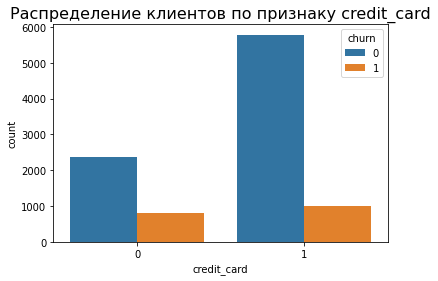

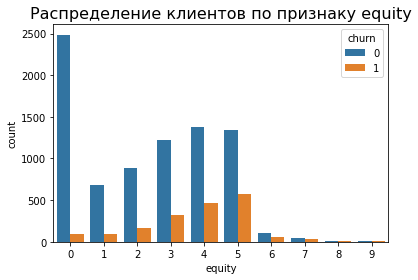

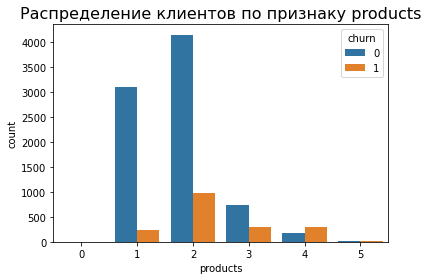

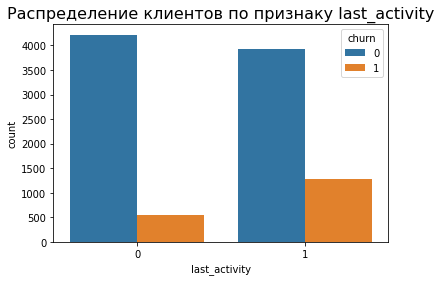

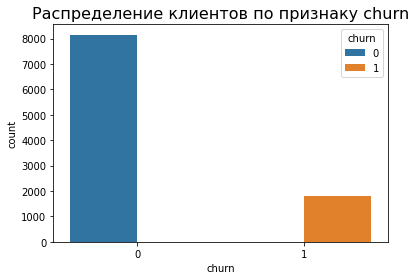

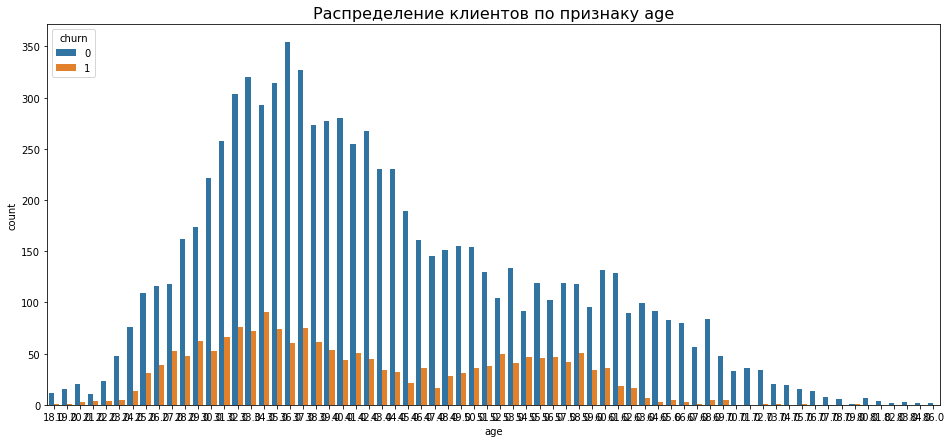

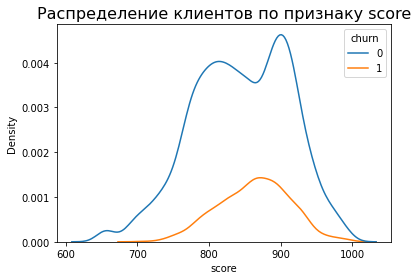

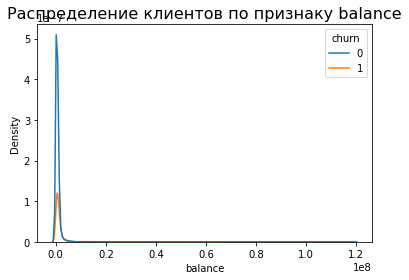

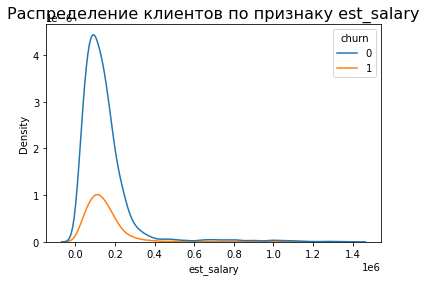

In [36]:
tables(df, hue='churn')    

Отток по городам дополнительно исследуем ниже.

Нас покидают клиенты с неплохим рейтингом, около 850, это клиенты с 3 и 5 продуктами банка и объектами недвижимости.
При этом, чем больше у них объектов недвижимости в собственности, тем больший процент ушедших среди них.
Они действительно активны, то есть предпринимают действия по сохранению текущих долговых обязательств.

Здесь мы отчетливо видим, что доля покинувших мужчин значительно больше чем женщин.
Кредитная карта действительно является показателем верности клиента.

Отдельно отразим доли ушедших по городам.

Общая доля ушедших:

In [37]:
df.groupby('churn')['churn'].count()/len(df['churn'])*100

churn
0    81.762583
1    18.237417
Name: churn, dtype: float64

18% ушедших. Практически пятая часть всех клиентов.

In [38]:
grouped_data = df.groupby(['city', 'churn']).size().reset_index(name='counts')
grouped_data

,city,churn,counts
0,Ростов,0,1151
1,Ростов,1,265
2,Рыбинск,0,2246
3,Рыбинск,1,437
4,Ярославль,0,4758
5,Ярославль,1,1117


In [39]:
# создание списка для названий городов
city_names = list(grouped_data['city'].unique())
city_names

['Ростов', 'Рыбинск', 'Ярославль']

In [40]:
# создание списка для значений в Pie Chart
churn_values = []
for city in city_names:
    churn_values.append(list(grouped_data[grouped_data['city'] == city]['counts']))

Визуализируем доля оттока клиентов по городам.

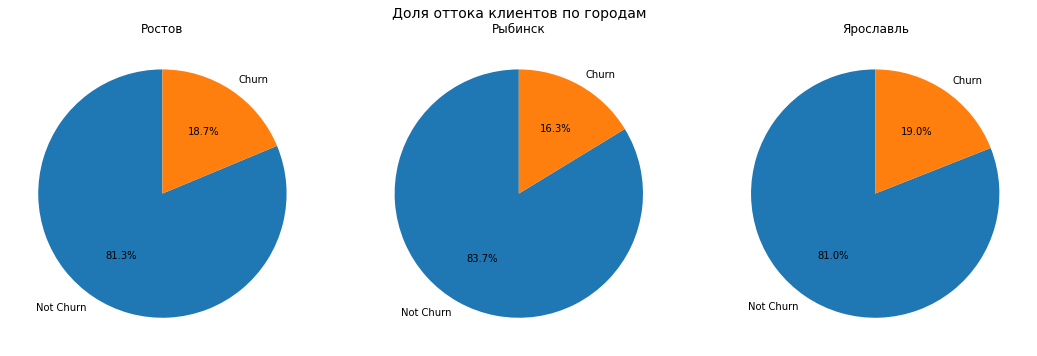

In [41]:
fig, ax = plt.subplots(1, len(city_names), figsize=(15,5))
for i, city in enumerate(city_names):    
    ax[i].pie(churn_values[i], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(city)
plt.suptitle('Доля оттока клиентов по городам', fontsize=14)
plt.tight_layout()
plt.show()

Меньше всего отток в Рыбинске, составляет 16,3%. В Ростове 18,7% и Ярослвле 19,0% практически одинаково.

**Выводы:**

В результате исследовательского анализа данных были выявлены зависимости между количеством продуктов, используемых клиентом, наличием объектов в собственности, оттоком клиентов и наличием кредитной карты. 

Клиенты с одним продуктом, не имеющие объектов в собственности, являются наиболее лояльными клиентами, которые нуждаются в стимулировании для более продолжительной связи с банком. Для таких клиентов первой группы рекомендуется предлагать дополнительные продукты и услуги с более выгодными условиями, такие как получение зарплаты на дебетовую карту и повышенный кэшбэк.
Клиенты с несколькими продуктами, не высокими баллами скоринга и высоким оттоком нуждаются в более индивидуальном подходе для удержания. Также были выявлены зависимости между количеством продуктов, используемых клиентом и наличием объектов в собственности. 
Исследование групп клиентов в разрезе признаков активности и оттока показало, что больше всего банк покидают пользователи нескольких продуктов (3 и более) с обычной зарплатой и при разном количестве объектов в собственности (большая доля при 3 и выше объектов). 
Ушедшие клиенты достаточно активны и могут иметь кредитную карту, но не многие. Они имеют неплохой рейтинг и часто являются собственниками нескольких объектов недвижимости.
При этом заметно больше мужчин уходят из банка, чем женщин.
Кредитная карта является показателем верности клиента, так как клиенты, пользующиеся кредитными картами, чаще остаются в банке.
Отдельно рассмотрены доли ушедших клиентов по городам, и было выявлено, что в целом нет существенной разницы между клиентами и их качеством (постоянством) в группах по городам, за исключение меньшего оттока в Рыбинске.
Выводы позволяют сделать предположение, что самая лояльная группа клиентов - это клиенты с одним продуктом, не имеющие объектов в собственности, которые также нуждаются в стимулировании для продолжительной связи с банком.
Клиенты с двумя продуктами самые многочисленные и имеют небольшой отток, даже несмотря на наличие нескольких объектов недвижимости.
Клиенты с тремя и более продуктами находятся в зоне риска и нуждаются в более индивидуальном подходе для удержания, например снижение процентной ставки на кредит, пролонгация кредита или предложение новых продуктов с более выгодными условиями. Также необходимо улучшить качество обслуживания и связи с клиентами, чтобы удерживать их в банке.

Общим выводом по исследовательскому анализу данных является то, что для удержания клиентов в банке необходимо применять индивидуальный подход и стимулирование для наиболее рискованных групп клиентов, таких как клиенты с несколькими продуктами, низкими баллами скоринга и объектами в собственности. Для данной группы риска необходимо предложить индивидуальные условия, чтобы удержать клиентов, например, снижение процентной ставки на кредит, пролонгация кредита или предложение новых продуктов с более выгодными условиями. 
Однако, наиболее лояльными клиентами являются клиенты с одним продуктом, не имеющие объектов в собственности, которые также нуждаются в стимулировании для продолжительной связи с банком. 
Также важно учитывать пол клиентов, наличие кредитных карт, город так как эти факторы могут влиять на вероятность оттока клиента из банка.
Также необходимо улучшить качество обслуживания и связи с клиентами, чтобы удерживать их в банке.


## Сегментация

**Сегментируем пользователей по количеству потребляемых продуктов в разрезе оттока**

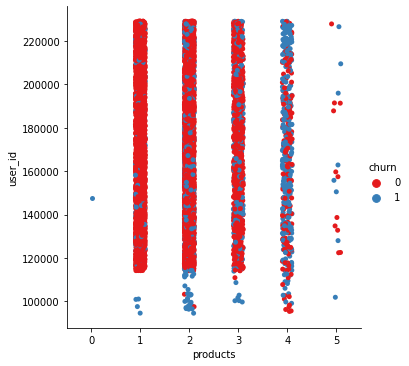

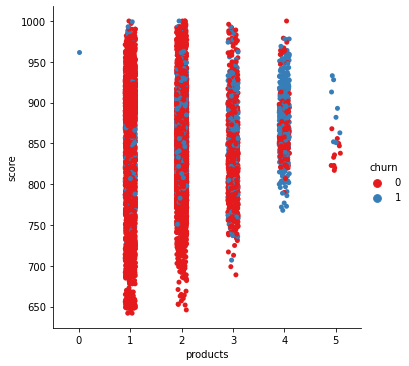

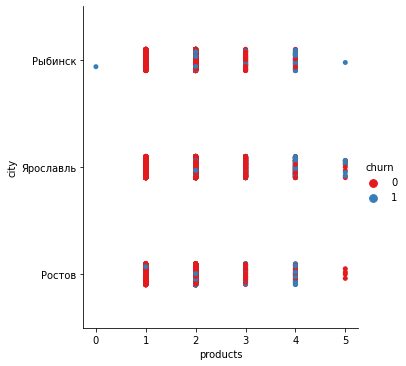

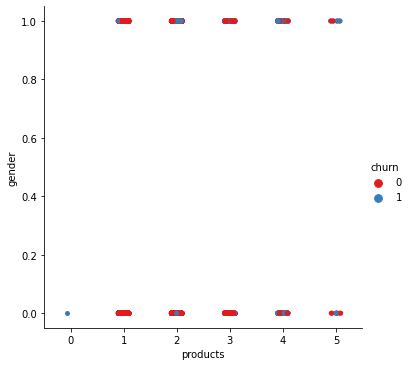

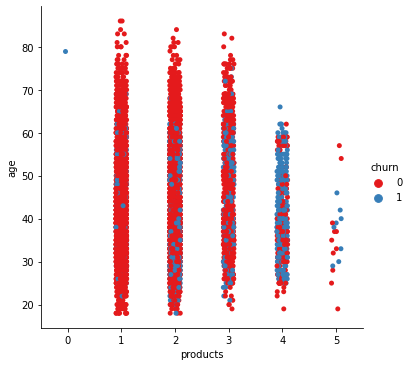

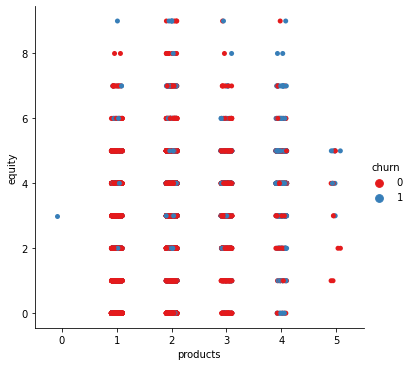

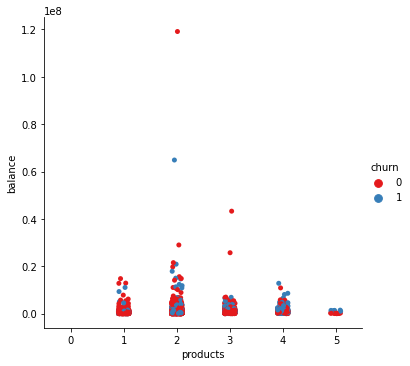

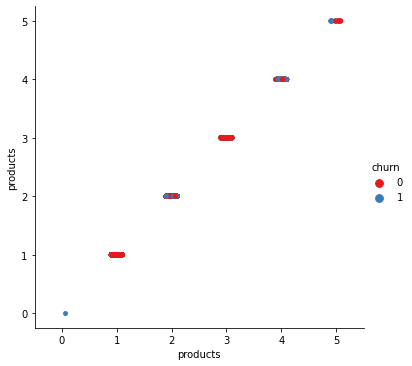

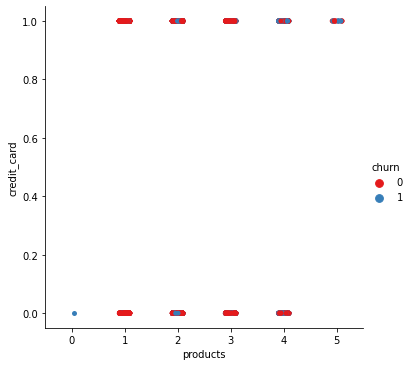

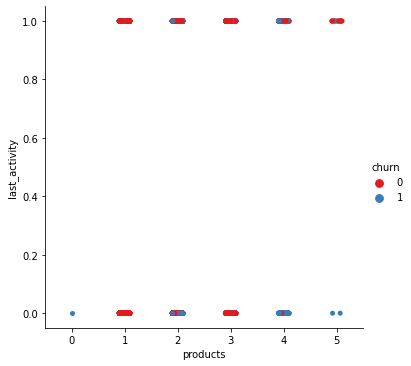

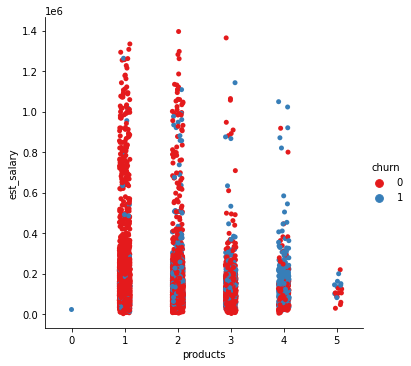

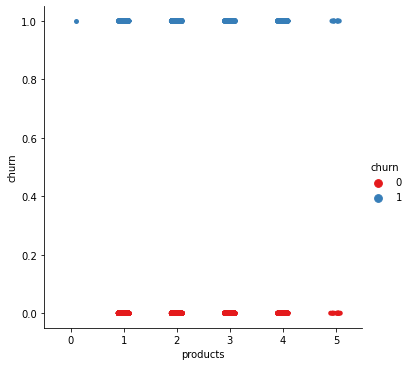

In [42]:
for column in df.columns.values:
    sns.catplot(y=column, x='products', data=df, jitter=True, hue='churn', palette='Set1');
    plt.show()

Рассмотрим отток по каждому признаку в разрезе количества используемых продуктов клиентом в банке:

- Заметно отток клиентов с 4 и 5 продуктами самый многочисленный, мы ранее это выявили. При этом клиентов с 5 продуктами очень мало.

- Балы скоринга имеют больший разброс у клиентов с немногими продуктами, но у них меньше отток. Клиенты с 3-5 продуктами имею средние и выше среднего баллы. Но это не коррелирует с малым оттоком, а наоборот.

- По городам отток с разным кол-вом продуктов не имеет отличий в тенденции. Она та же, чем больше продуктов, тем больше отток.

- На графиках построенных ранее в ИАД мужчины имеют большие показатели оттока с несколькими продуктами, чем женщины.

- Люди старше 60 лет и с 1-3 продуктами, почти не отточны. Клиенты с 4-5 продуктами имеют более активный до пенсионный возраст, но при этом большой отток. Очевидно, это большая долговая нагрузка.

- Есть закономерность в большом кол-ве объектов в собственности и большим оттоком. Люди без объектов, практически не отточны, за исключение тех. у которых 405 продуктов банка.

- Есть большая доля оттока среди клиентов с большой заработной платой, даже при 1,2 продукта банка в использовании.

- Согласно ИАД клиенты с кредитной картой имеют большую зарплату, при этом у них меньше продуктов банка, всего 1 или 2.
У части клиентов с одним продуктом в качестве кредитной карты имеется малый рейтинг и большая зарплата.
Ушедшие клиенты, это клиенты с 3 и 4 продуктами без большой зарплаты и средним кредитным рейтингом.

- Больше всего клиентов с большим оттоком у которых 4 продукта и они почти все активные. То есть очевидно они выполняют операции в банке и ищут пути снижения долговых нагрузок (вклады, кредитки, пролонгация)

- Отток клиентов 4 продуктами идет несмотря на то, что зарплата у них выше среднего. Люди с большой зарплатой и 1,2 продукта почти без отточны.

**Общие выводы оттока в разрезе продуктов (сегменты):**

- Клиенты, у которых есть 4 или 5 продуктов, имеют примерно одинаково большой уровень оттока, они до пенсионного возраста, средними и большими баллами скоринга, активны, преимущественно мужчины в том числе с кредитной картой.

- Клиенты, у которых есть только 1 продукт, имеют наименьший уровень оттока, он разного возраста, баллами скоринга и преимущественно пользователи кредитной карты.

- Клиенты с 2 продуктами без кредитной карты до 65 лет.

- Клиенты с 3 продуктами банка без кредитной карты до 65 лет.

- У клиентов старше 65 лет отток практически отсутствует. Они пользователи 2 или 3 продуктов.


## Статистическая проверка гипотез

**Первая гипотеза:** Есть различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

 Сформулируем нулевую и альтернативную гипотезы:
```
H0: Нет различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

H1: Есть различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
```

Уровень значимости примем α = 0.05.

Соберём выборки из двух групп клиентов: тех, кто использует два продукта банка, и тех, кто использует один продукт банка.

In [43]:
# выборки клиентов, использующих один и два продукта банка
one_product = df[df['products'] == 1]['age']
two_products = df[df['products'] == 2]['age']

Сравним размеры выборок.

In [44]:
one_product.shape[0]

3323

In [45]:
two_products.shape[0]

5119

Проверим условия теста на нормальность распределения.

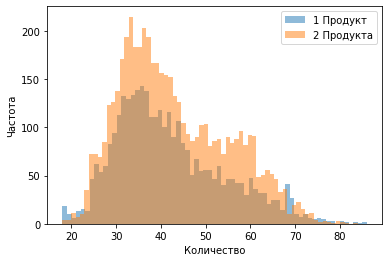

In [46]:
# Создаем гистограммы для каждой переменной
plt.hist(one_product, bins=67, alpha=0.5, label='1 Продукт')
plt.hist(two_products, bins=67, alpha=0.5, label='2 Продукта')

# Настраиваем оси и легенду
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Отображаем график
plt.show()

Видим распределения с положительной асимметрией (распределение Пуассона).  При этом распределение возраста клиентов с 2 продуктами имеют больше клиентов почти в каждом возрасте, особенно их доля больше с 50 до 60 лет.

Выполним тест Шапиро-Уилка на нормальность распределения.

In [47]:
shapiro(one_product)

ShapiroResult(statistic=0.9569536447525024, pvalue=2.7809143816725107e-30)

In [48]:
shapiro(two_products)

ShapiroResult(statistic=0.9615522027015686, pvalue=7.941429186486062e-35)

Из вывода мы видим, что статистика теста равна 0,95-0,96, а соответствующее значение p равно 2 и 7.

Поскольку p-значение не меньше 0,05. У нас нет достаточных доказательств, чтобы сказать, что данные выборки получены из нормального распределения.

Исходя из этого Для проверки данной гипотезы используем Тест Уилкоксона-Манна-Уитни, который позволит сравнить значения возраста в двух группах.

In [49]:
# Тест Уилкоксона-Манна-Уитни
stat, p_value = mannwhitneyu(one_product, two_products)

In [50]:
# Вывод результатов
print('Статистика теста:', stat)
print('p-значение:', p_value)

Статистика теста: 8297191.5
p-значение: 0.057138410813417605


In [51]:
# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print('Нет оснований отвергать H0')
else:
    print('Отвергаем H0 в пользу H1')

Нет оснований отвергать H0


Таким образом у нас нет достаточных доказательств что бы сказать, что есть различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.


**Вторая гипотеза:** 

Есть ли различия между средними баллами скоринга клиентов с кредитной картой и без нее.

 Сформулируем нулевую и альтернативную гипотезы:
```
H0: Нет различия между средними баллами скоринга клиентов с кредитной картой и без нее.

H1: Есть различия между средними баллами скоринга клиентов с кредитной картой и без нее.
```

Уровень значимости примем α = 0.05.

Соберём выборки из двух групп клиентов: тех, кто использует кредитную карту банка, и тех, кто ее не использует.

In [52]:
# выборки клиентов, использующих крелитную карту и не использующих
uses_card = df[df['credit_card'] == 1]['score']
not_uses_card  = df[df['credit_card'] == 0]['score']

Сравним размеры выборок.

In [53]:
uses_card.shape[0]

6784

In [54]:
not_uses_card.shape[0]

3190

Проверим условия теста на нормальность распределения.

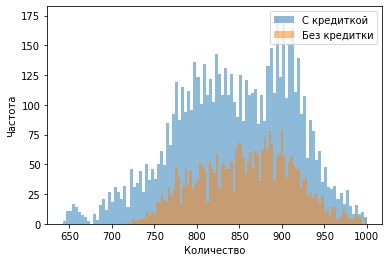

In [55]:
# Создаем гистограммы для каждой переменной
plt.hist(uses_card, bins=100, alpha=0.5, label='С кредиткой')
plt.hist(not_uses_card, bins=100, alpha=0.5, label='Без кредитки')

# Настраиваем оси и легенду
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Отображаем график
plt.show()

Распределение похоже на нормальное. Проверим это.

Выполним тест Шапиро-Уилка на нормальность распределения.

In [56]:
shapiro(uses_card)

ShapiroResult(statistic=0.985936164855957, pvalue=1.9749684964841685e-25)

In [57]:
shapiro(not_uses_card)

ShapiroResult(statistic=0.9902668595314026, pvalue=5.870979836184245e-14)

Из вывода мы видим, что статистика теста равна 0,98-0,99, а соответствующее значение p равно 1,97 и 5
87.

Поскольку p-значение не меньше 0,05. У нас нет достаточных доказательств, чтобы сказать, что данные выборки получены из нормального распределения.

Исходя из этого Для проверки данной гипотезы используем Тест Уилкоксона-Манна-Уитни, который позволит сравнить значения средних баллов скоринга в двух группах.

In [58]:
# Тест Уилкоксона-Манна-Уитни
stat, p_value = mannwhitneyu(uses_card, not_uses_card)

In [59]:
# Вывод результатов
print('Статистика теста:', stat)
print('p-значение:', p_value)

Статистика теста: 9801698.5
p-значение: 3.055638144159025e-14


In [60]:
# Проверка гипотезы
alpha = 0.05
if p_value > alpha:
    print('Нет оснований отвергать H0')
else:
    print('Отвергаем H0 в пользу H1')

Отвергаем H0 в пользу H1


Таким образом мы можем говорить о том, что есть различия между средними баллами скоринга клиентов с кредитной картой и без нее.

## Выводы, рекомендации по удержанию клиентов

Даем рекомендации по каждому сегменту в разрезе количества потребляемых продуктов, обращая особое внимание на отток. В соответсвии с общей задачей - снизить отток клиентов банка.

**Сегменты:**

- Клиенты, у которых есть 4 или 5 продуктов, имеют примерно одинаково большой уровень оттока, они до пенсионного возраста, средними и большими баллами скоринга, активны, преимущественно мужчины, в том числе с кредитной картой.

Рекомендации:

Актуализировать баллы скоринга и скорректировать маркетинговую политику категории таких клиентов. Для того чтобы удержать их, рекомендуется предложить персонализированные услуги и продукты, учитывая их активный возраст. Это может быть кешбек от партнеров банка по покупкам кредитной картой, карты рассрочки, что бы снизить долговую, пролонгация задолженности при ее наличии и предложение новых продуктов с более выгодными условиями. Так же более привлекательные предлагать проценты по вкладам тем клиентам с 4 и 5 продуктами, у которых высокая заработная плата вместе с пакетом подписок на различные сервисы партнеров-компаний банка. Так же инвестиционные продукты банка, ценные бумаги, ПИФ-ы. Таким образом укреплять партнерство с клиентами, увеличивать привлекательность банка как бренда и помощника в повседневной жизни. Данные мероприятия должны быть нацелены на поддержание уровня жизни таких клиентов вместе со снижением их долговых обязательств.

- Клиенты, у которых есть только 1 продукт, имеют наименьший уровень оттока, они разного возраста, баллами скоринга и преимущественно пользователи кредитной карты, без объектов собственности.

Рекомендации:

Очевидно нужно укреплять отношения банка с такими клиентами, предлагать им дополнительные продукты банка. Раз нет объектов недвижимости, то для активных клиентов среднего возраста предлагаем ипотеку по льготным ставкам. Таким образом способствуем длительно отношению с банком. Для этой группы рекомендуется предлагать новые продукты и услуги, чтобы увеличить количество продуктов на клиента и таким образом повысить его лояльность. У клиентов с кредитной картой и большой зарплатой с одним продуктом следует предложить индивидуальные условия и пересмотреть балы скоринга.

- Клиенты с 2 продуктами без кредитной карты до 65 лет.

Рекомендации:

Выделяем тех у кого нет кредитки среди всех людей с 2 продуктами, таких каждый пятый. Предлагаем им кредитную карту для укрепления связи с банком.
В целом данной группе клиентов нужно увеличивать лояльность, путем маркетинга, предложения низких ставок по ипотеке, т.к. многие из них имеют несколько объектов недвижимости.

- Клиенты с 3 продуктами банка без кредитной карты до 65 лет.

Рекомендации:

Клиентов с 3 продуктами мы причисляем к группе риска и пользоваться кредиткой могут только те, у кого баллы скоринга выше среднего. Можно пересмотреть баллы скоринга для увеличения закредитованности клиентов и увеличения их активности обращая внимание на заработную плату.
В целом данной группе клиентов нужно увеличивать лояльность, путем маркетинга, предложения низких ставок по ипотеке, т.к. у них тоже многие имеют несколько объектов недвижимости в собственности.

- У клиентов старше 65 лет отток практически отсутствует. Они пользователи 2 или 3 продуктов.

Рекомендации:

Данная категория пенсионеры и у них имеются постоянные поступления денежных средств от государства. Первоочередно тех, у кого один продукт кредитная карта, предложить дебетовую (накопительную) карту.
Рекомендовать повышенные ставки по вкладам с коротким и длинным горизонтом закрытия вклада с доп. внесениями средств. Так же инвестиционные продукты банка, ПИФ-ы, акции, драгоценные металлы.


**Общие рекомендации:**

Изучить подробнее клиентов банка из Рыбинска и сегмент в нем который понижает общий отток.

Условия продуктов банка для мужчин прелагать с учетом сторонних платежей у них, например: алименты, долг в других банках, перекредитованность.

Концепция "Cross-selling", предложение индивидуальных решений, фокусирование на удовлетворении потребностей клиента, могут стать ключевыми факторами в удержании этих клиентов и позволят банку повышать оценку своей работы снизив отток по сегментам.

* [Презентация](https://disk.yandex.ru/d/V06t80TIS1MepQ) 
* [Дашборд](https://public.tableau.com/app/profile/denis.dorofeev/viz/Book3_16865731236020/Dashboard1?publish=yes)